<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

from nomeroff_net.pipelines.number_plate_localization_x import NumberPlateLocalizationX

In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              number_plate_localization_class=NumberPlateLocalizationX,
                                              image_loader="opencv")

Loading weights from checkpoint (/mnt/raid/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/raid/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [3]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example2.jpeg'),
])

/usr/local/lib64/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


images_bboxs ([[868.6838112831116, 459.0550364255906, 1088.8183364868164, 577.2845925807953, 0.9984359, 0.96706814]],)
images_points ([[[874.2968042385617, 572.4425214560863], [874.2968042385615, 510.4012919336191], [1082.1898041164914, 466.3027673059537], [1082.1898041307259, 528.3439883506054]]],)


/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:124: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


images_bboxs ([[848.5592784881592, 379.9898109436035, 945.8506679534912, 404.6516914367676, 0.9982821, 0.9311614], [432.77968406677246, 380.35411500930786, 526.6810617446899, 402.9304881095886, 0.99673164, 0.9263527]],)
images_points ([[[841.1399977864554, 405.64000072479246], [841.1399989789022, 378.3599955511093], [946.0, 378.3599909591675], [946.0, 405.6399966430664]], [[432.0, 401.9200009229706], [432.00000118255616, 382.07999544841476], [525.0, 382.0799913923915], [525.0, 401.91999659654573]]],)


In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['AC4921CB']


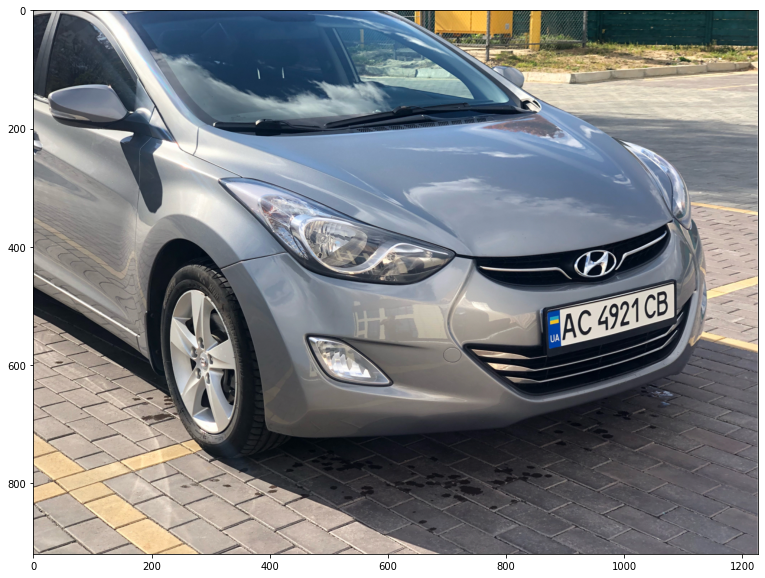

['RP70012', 'JJF509']


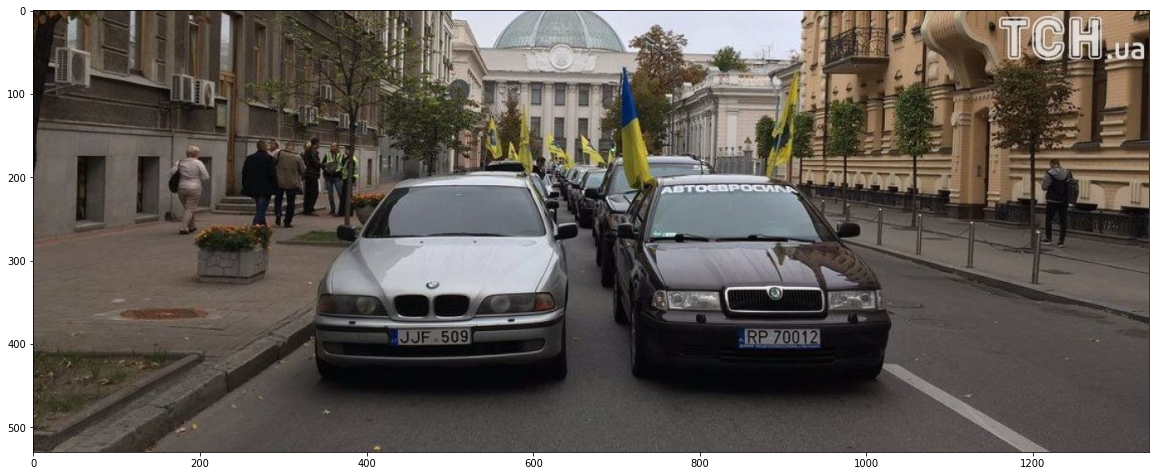

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, text in zip(images, texts):
    print(text)
    plt.imshow(img)
    plt.show()